Enter the type of image 
(A: 可見光(Visible), 
B: 彩色(RGB), 
C: 色調強化(Enhanced), 
D: 黑白(Gray Scale), 
E: 真實色(True Color)) -> A
Enter the area size
(A: 全景(WorldWide), 
B: 東亞(East Asia), 
C: 臺灣(Taiwan)) -> C
Enter the time -> 2022/05/12 06:00


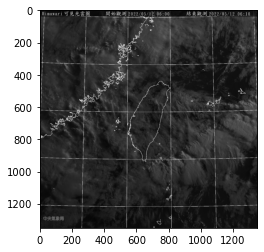

In [5]:
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import matplotlib.pyplot as plt
import matplotlib.image as img
import requests

url = 'https://www.cwb.gov.tw/V8/C/W/OBS_Sat.html'
s = Service(r'C:\SDK\chromedriver_win32\chromedriver.exe')

browser = webdriver.Chrome(service=s)
browser.maximize_window()
browser.get(url)

sleep(1)

_type = input(r'''Enter the type of image 
(A: 可見光(Visible), 
B: 彩色(RGB), 
C: 色調強化(Enhanced), 
D: 黑白(Gray Scale), 
E: 真實色(True Color)) -> ''')

if _type == 'A':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[1]/ul/li[1]/a').click()
elif _type == 'B':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[1]/ul/li[2]/a').click()
elif _type == 'C':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[1]/ul/li[3]/a').click()
elif _type == 'D':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[1]/ul/li[4]/a').click()
elif _type == 'E':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[1]/ul/li[5]/a').click()


area = input(r'''Enter the area size
(A: 全景(WorldWide), 
B: 東亞(East Asia), 
C: 臺灣(Taiwan)) -> ''')
    
if area == 'A':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[2]/div/div[2]/div[1]/form/div/div[1]/div/label[1]').click()
elif area == 'B':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[2]/div/div[2]/div[1]/form/div/div[1]/div/label[2]').click()
elif area == 'C':
    browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[2]/div/div[2]/div[1]/form/div/div[1]/div/label[3]').click()


time = input(r'Enter the time -> ')
browser.find_element(by=By.XPATH, value='//*[contains(text(), "{0}")]'.format(time)).click()
# 2022/05/12 06:00


pict = browser.find_element(by=By.XPATH, value='/html/body/div[4]/main/div[2]/div/div[1]/div[2]/div[1]/div/img')
img_data = requests.get(pict.get_attribute('src')).content
with open('img.jpg', 'wb') as _img:
    _img.write(img_data)
    
image = img.imread('img.jpg')
plt.imshow(image)
plt.show()